# Load and Inspect Data
Import pandas and load the dataset. Display first few rows, shape, and info about columns.

In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\AS\rep\kaggle\housing_prices\train.csv'
data = pd.read_csv(file_path)

# Display the shape of the dataset
print(f"Shape of the dataset: {data.shape}")

# Display the first few rows of the dataset
data.head()

Shape of the dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Handle Missing Values
Identify missing values in each column, visualize them, and implement appropriate handling strategies.

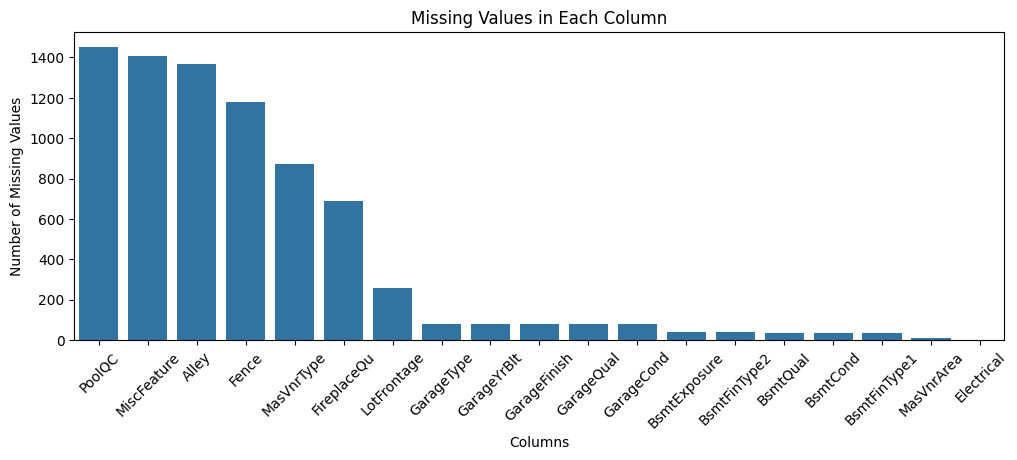

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify missing values in each column
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(ascending=False, inplace=True)

# Visualize missing values
plt.figure(figsize=(12, 4))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45)
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

# Numerical Features Analysis
Create histograms and box plots for numerical features to understand their distributions and identify outliers.

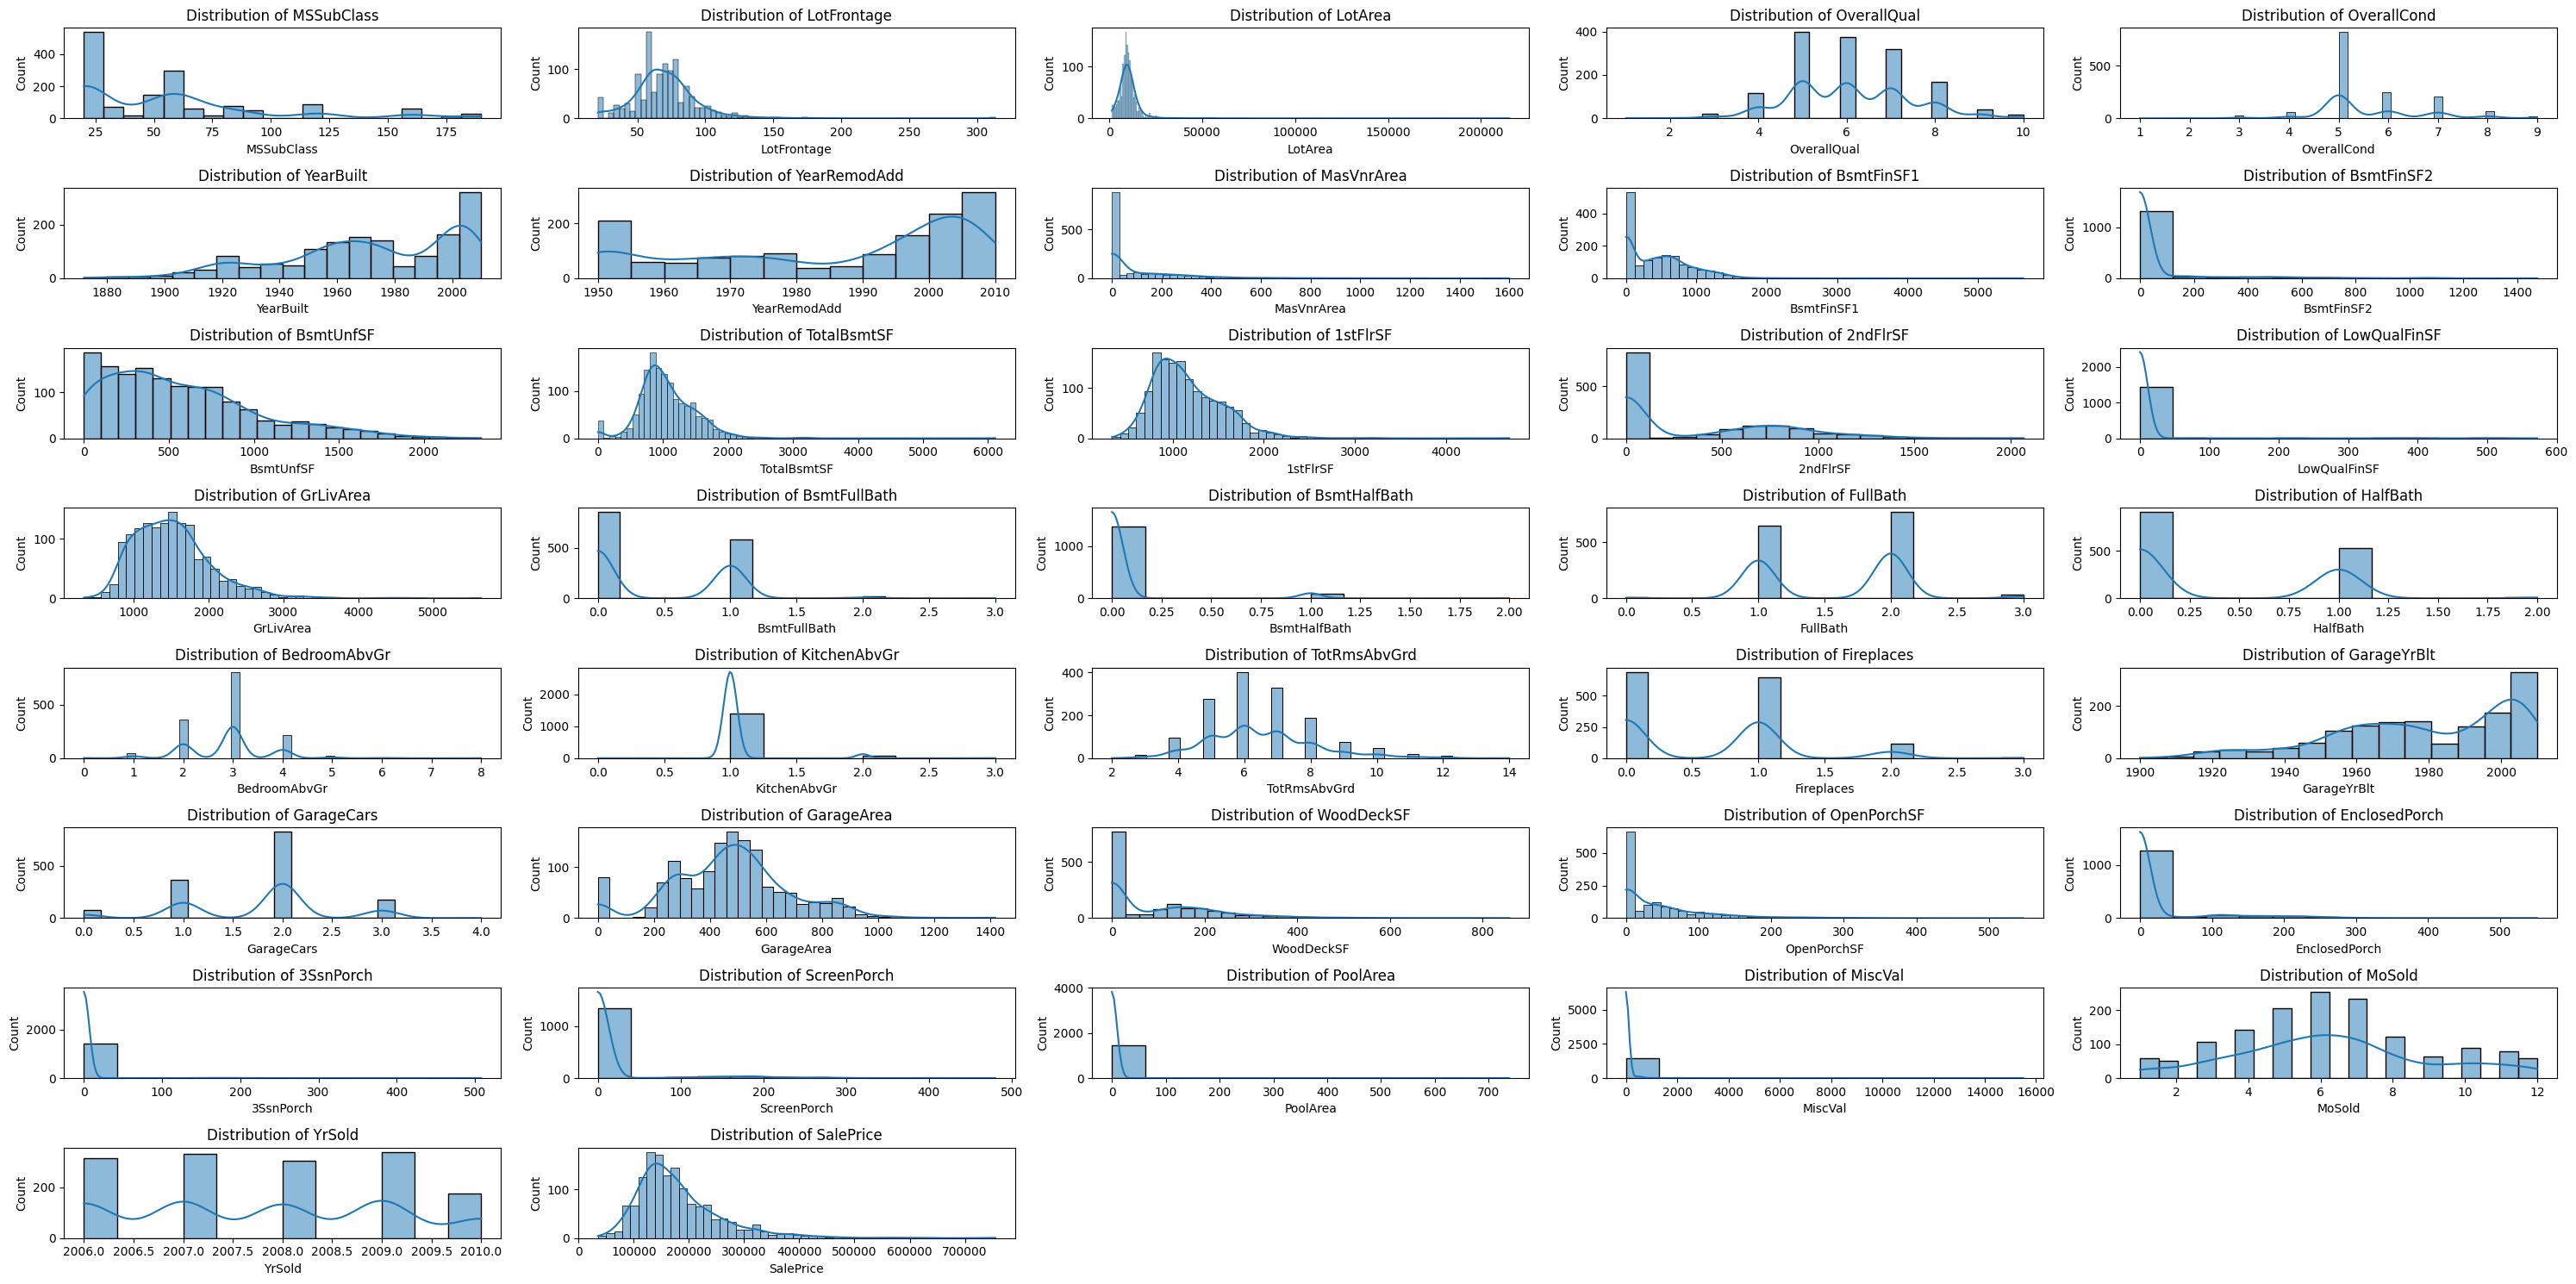

In [13]:
# Analyze the distribution of numerical features
plt.figure(figsize=(30, 15))
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
# remove Id
num_cols = num_cols.drop('Id')
for i, col in enumerate(num_cols):
    plt.subplot(8, 5, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Categorical Features Analysis
Analyze categorical variables using count plots and bar charts to understand feature distributions.

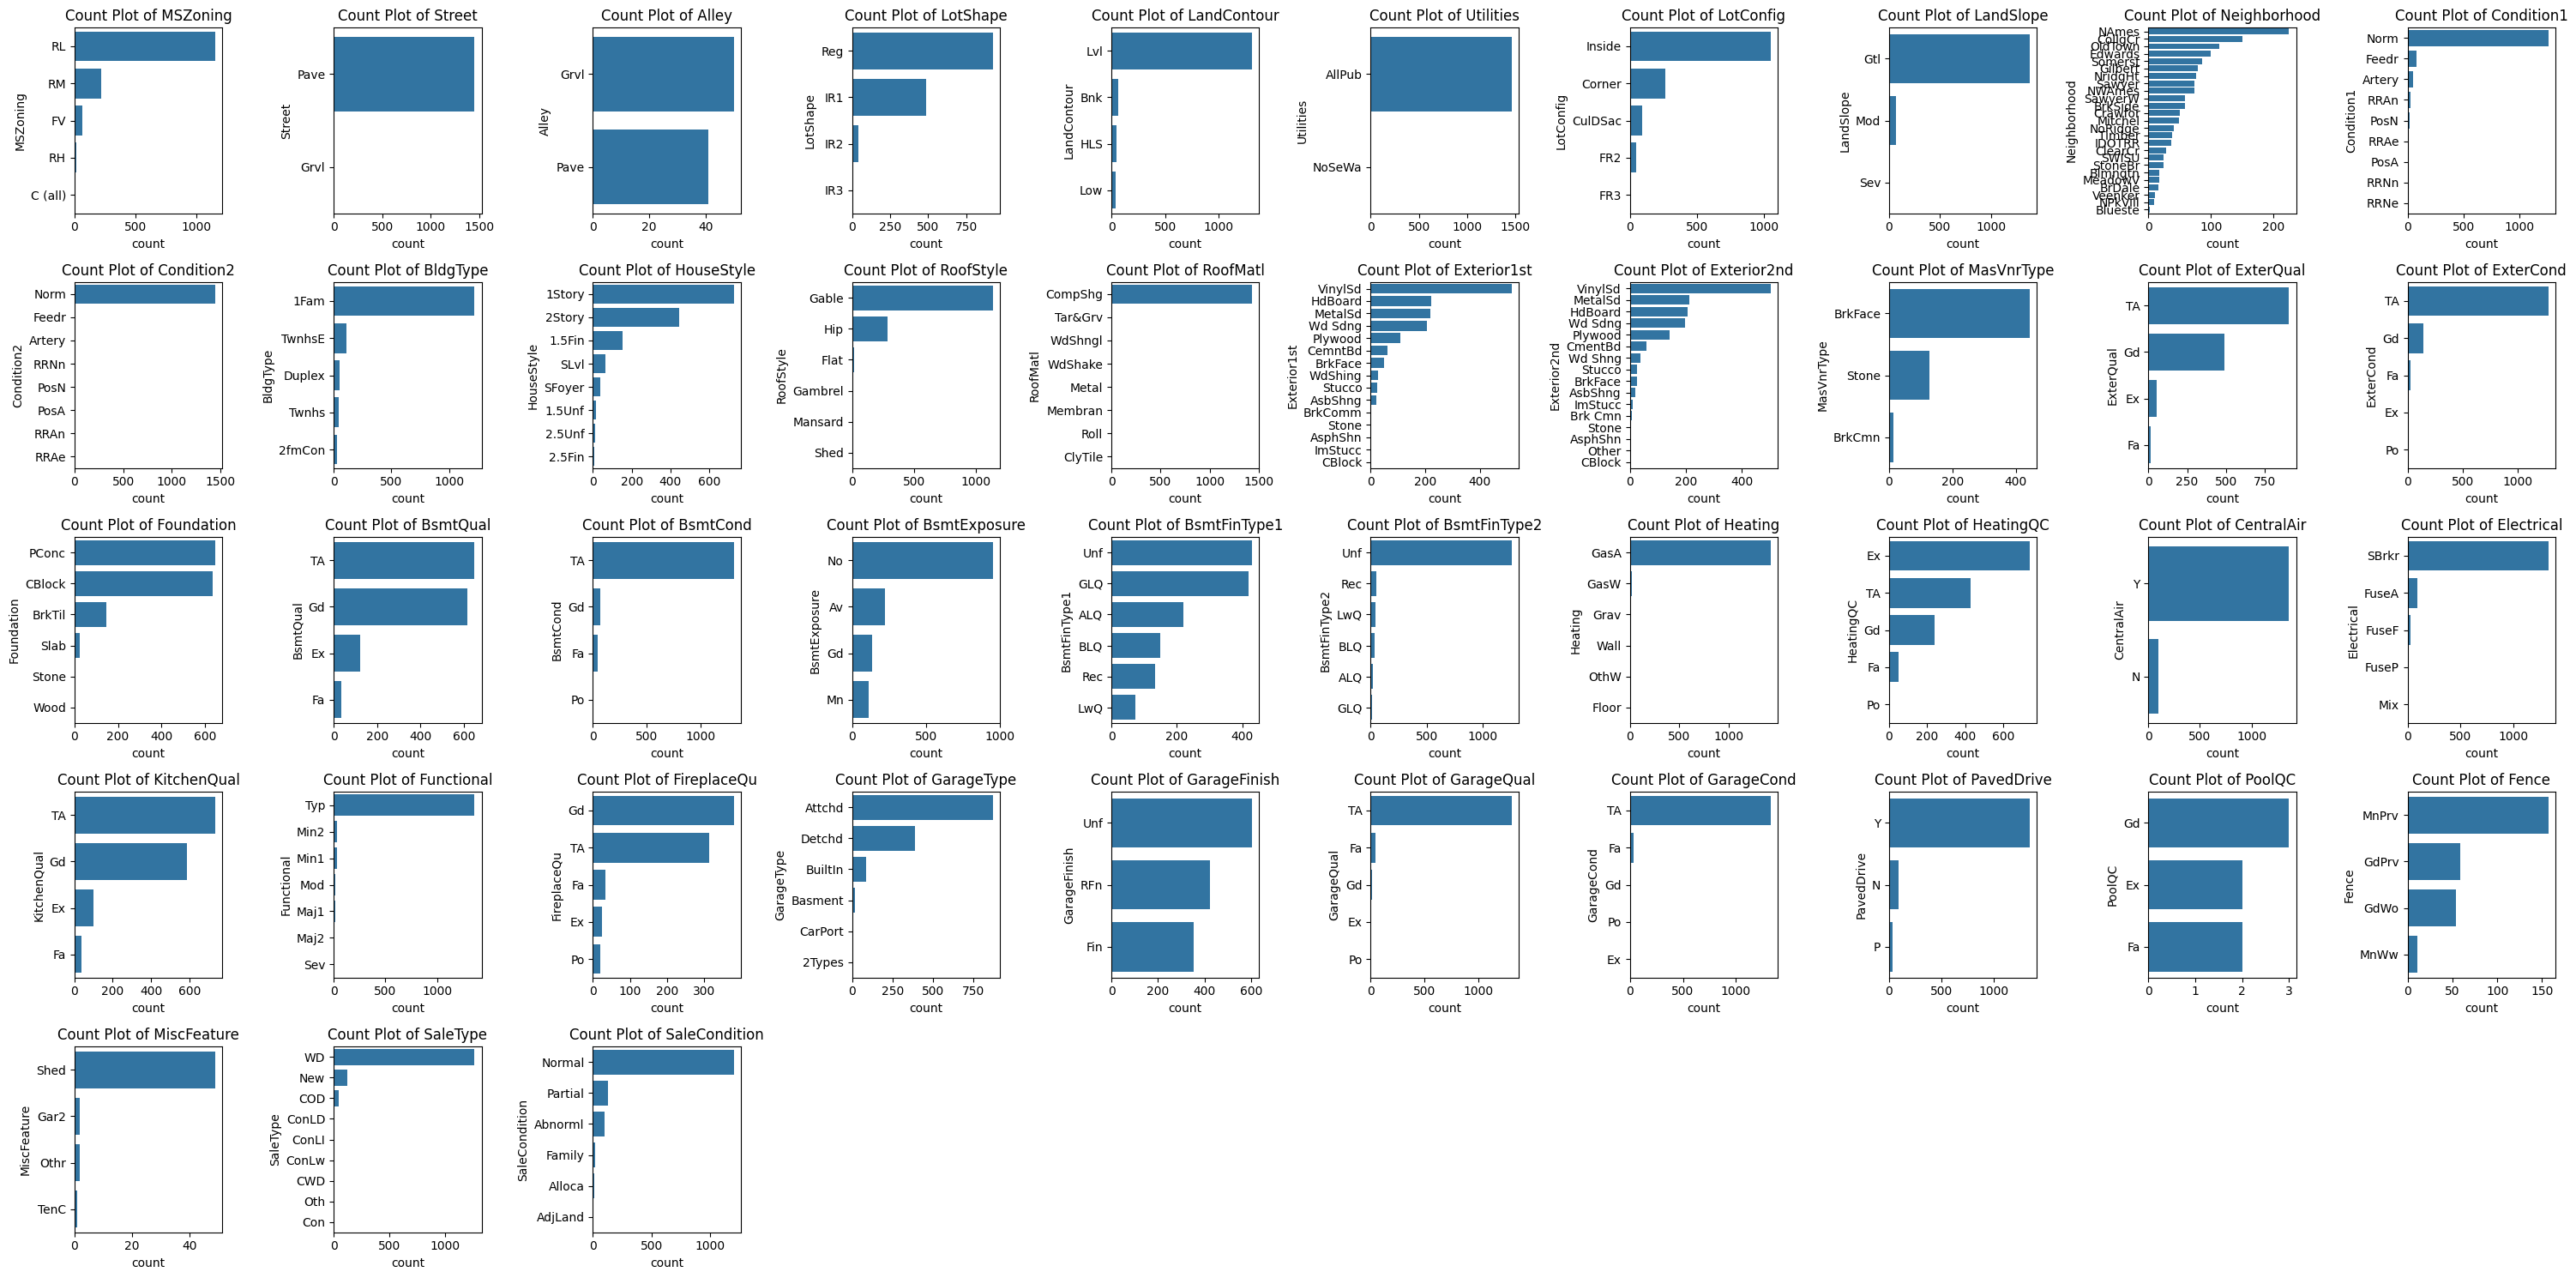

In [17]:
# Categorical Features Analysis

# Identify categorical columns
cat_cols = data.select_dtypes(include=['object']).columns

# Plot count plots for each categorical feature
plt.figure(figsize=(30, 15))
for i, col in enumerate(cat_cols):
    plt.subplot(5, 10, i + 1)
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

# Correlation Analysis
Create correlation matrix heatmap and identify strongly correlated features with the target variable (SalePrice).

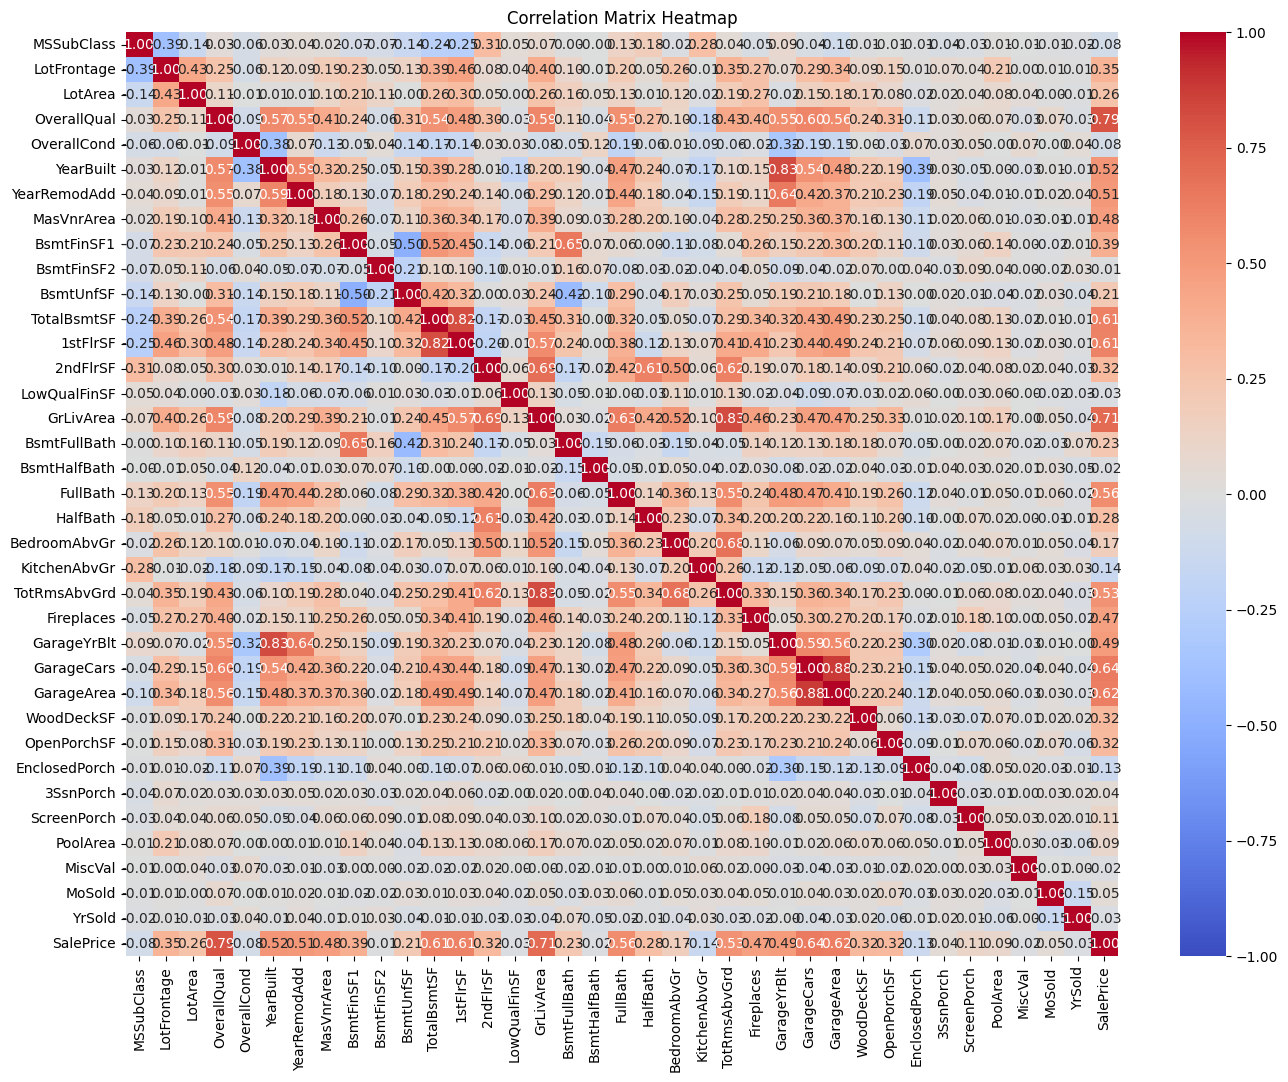

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for the numerical columns
corr_matrix = data[num_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Price Distribution Analysis
Detailed analysis of the target variable (SalePrice) including distribution plot and outlier detection.

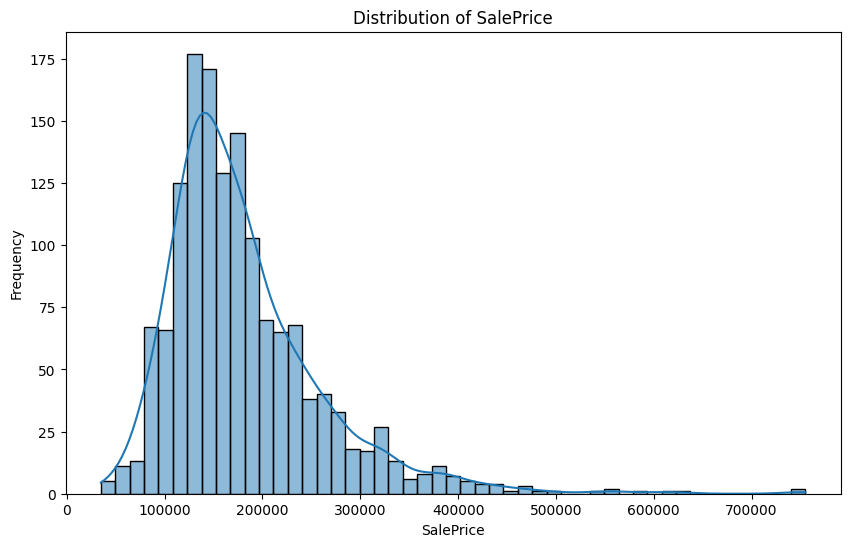

Number of outliers in SalePrice: 61
Lower bound: 3937.5
Upper bound: 340037.5
Number of lower bound outliers: 0
Number of upper bound outliers: 61
      SalePrice
11       345000
53       385000
58       438780
112      383970
151      372402
...         ...
1268     381000
1353     410000
1373     466500
1388     377500
1437     394617

[61 rows x 1 columns]


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Calculate and display the interquartile range (IQR) for 'SalePrice'
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points outside 1.5 * IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound_outliers = data[data['SalePrice'] < lower_bound]
upper_bound_outliers = data[data['SalePrice'] > upper_bound]
outliers = pd.concat([lower_bound_outliers, upper_bound_outliers])

# Display the number of outliers
print(f"Number of outliers in SalePrice: {outliers.shape[0]}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Number of lower bound outliers: {lower_bound_outliers.shape[0]}")
print(f"Number of upper bound outliers: {upper_bound_outliers.shape[0]}")

# Display the outliers
print(outliers[['SalePrice']])

# Feature Relationships
Create scatter plots and pair plots to visualize relationships between important features and house prices.

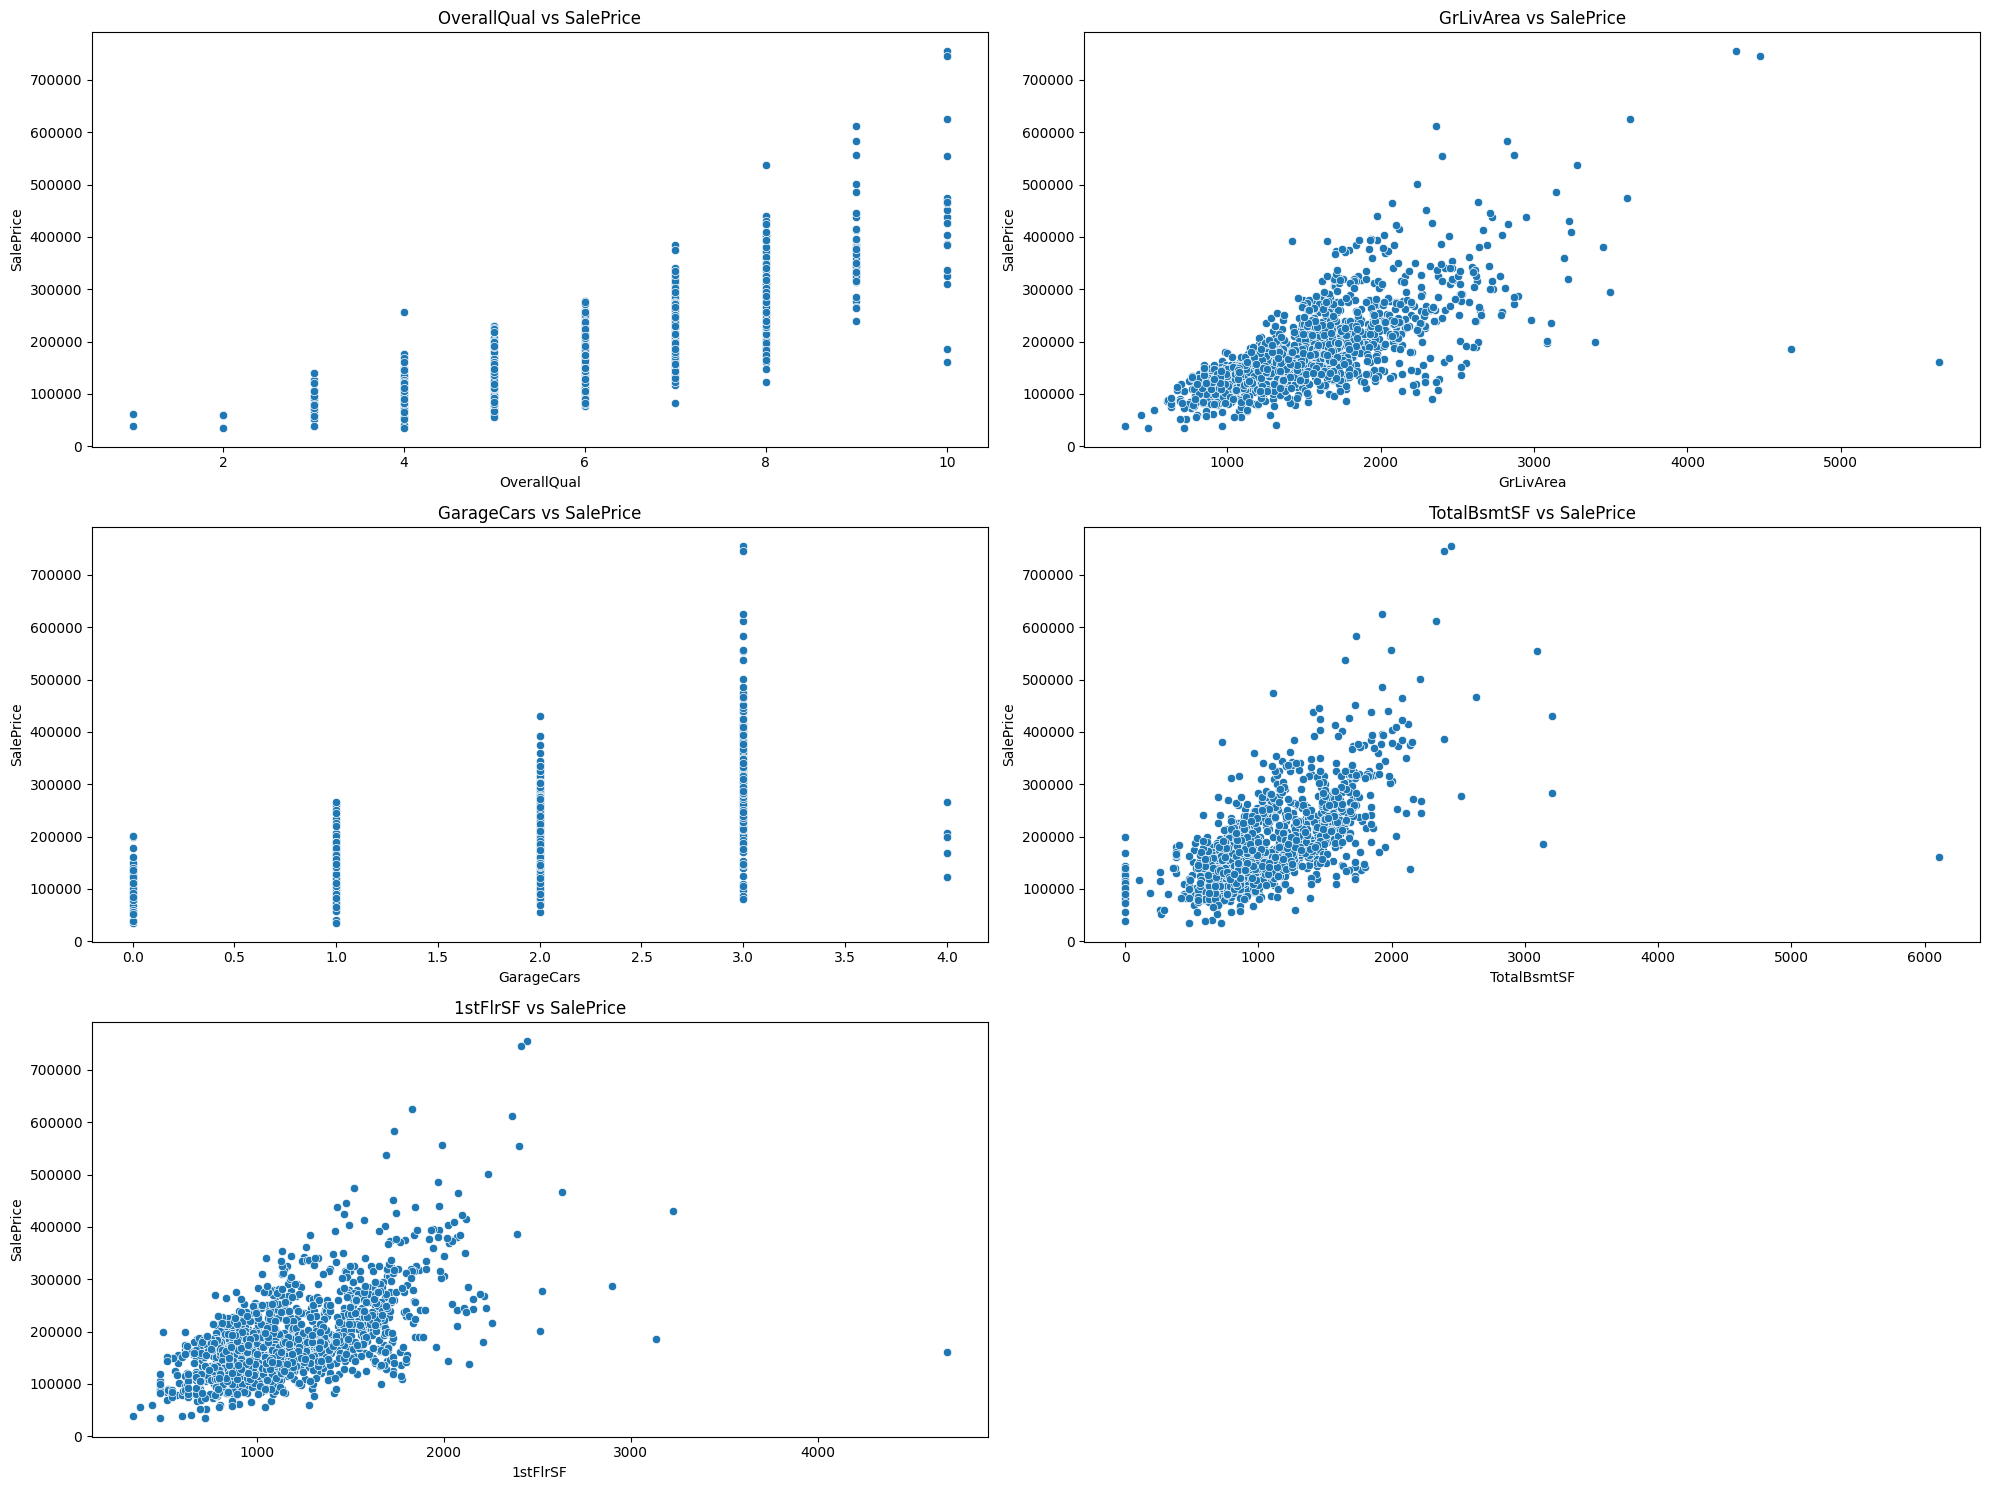

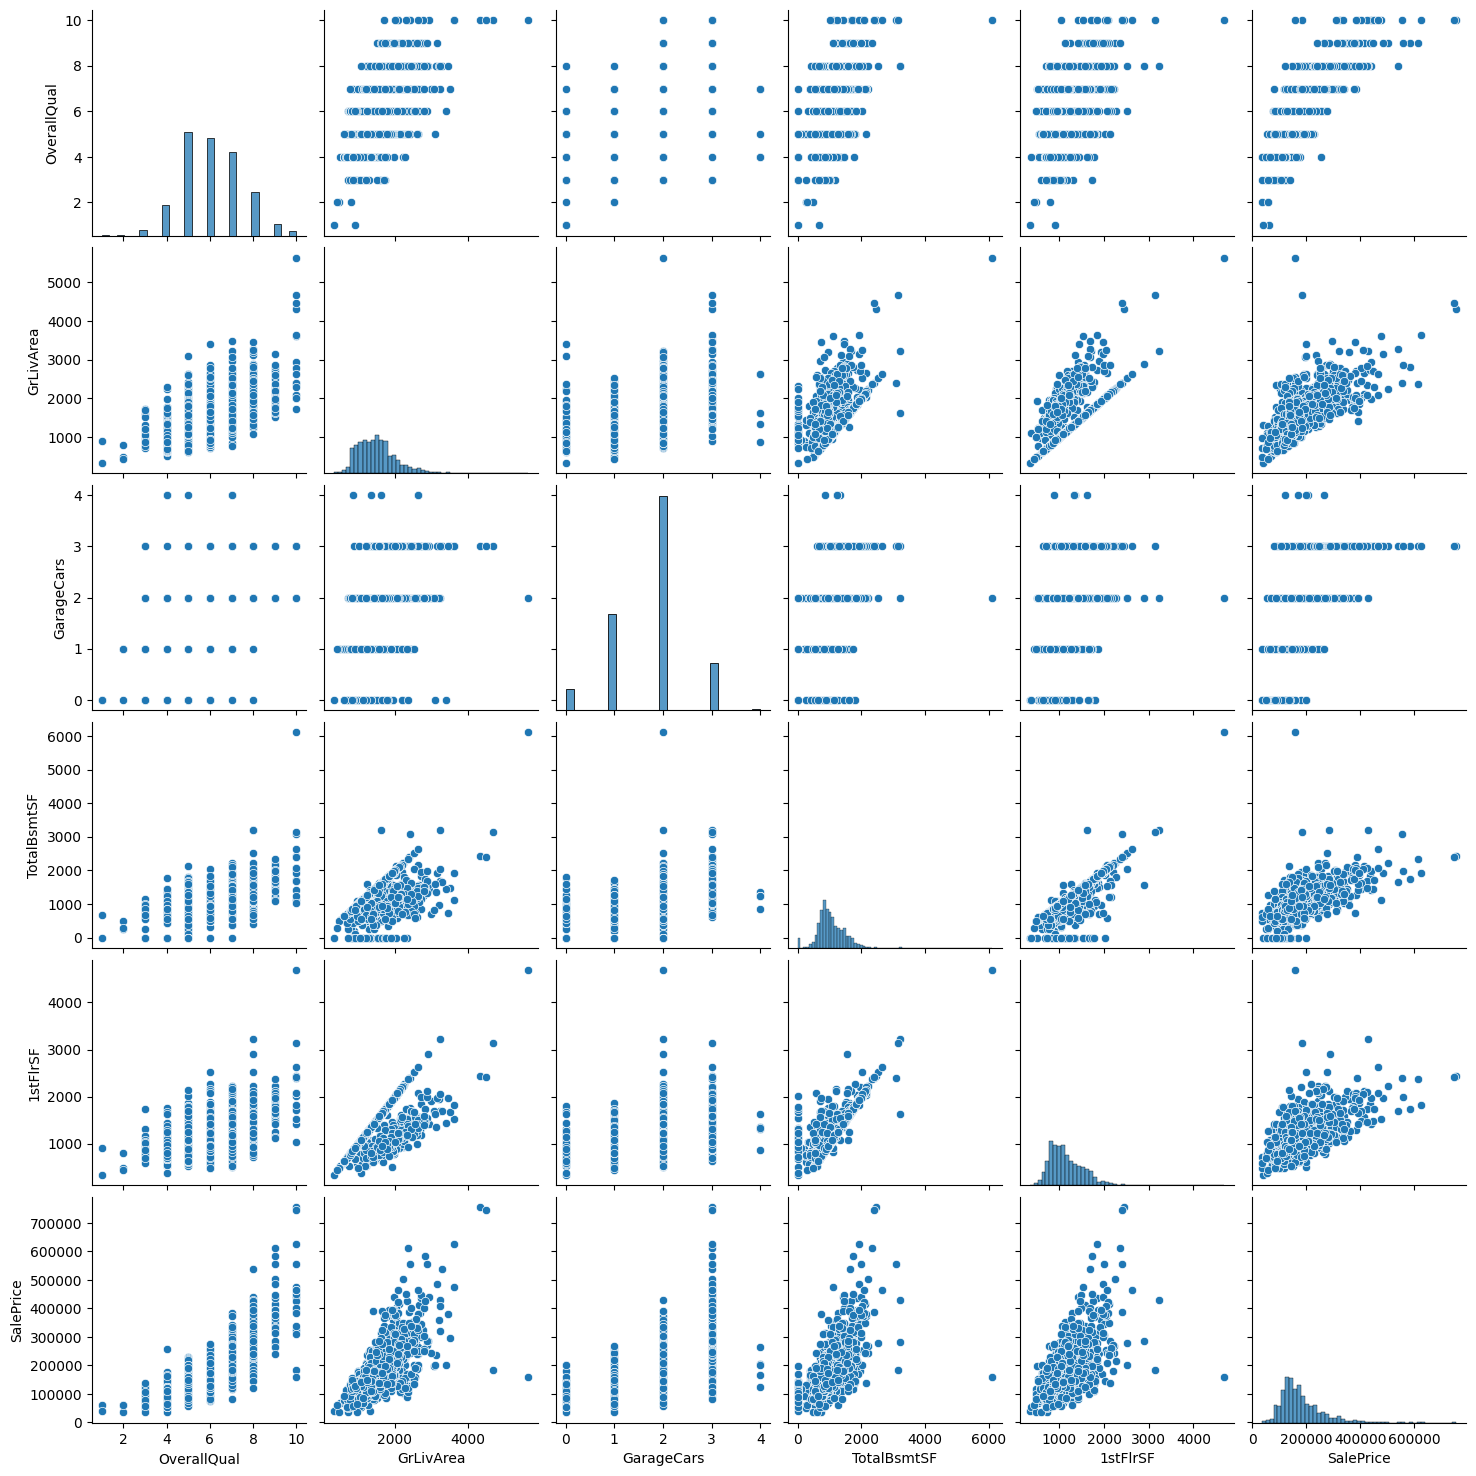

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots to visualize relationships between important features and SalePrice
important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(important_features):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x=data[feature], y=data['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
plt.tight_layout()
plt.show()

# Pair plot to visualize relationships between important features and SalePrice
sns.pairplot(data, vars=important_features + ['SalePrice'])
plt.show()